In [1]:
import numpy as np
import matplotlib.pyplot as plt

from izhikevich_rnn import Izhikevich
from test_models import LorenzAttractor

In [2]:
T = 10000
dt = 4e-2
t = np.arange(0, T, dt)

x = np.sin(2 * 5 * np.pi * t / 1000)
x = x.reshape(-1, 1)

In [3]:
def z_transform(signal):
    return (signal - signal.mean(axis=0)) / signal.std(axis=0)

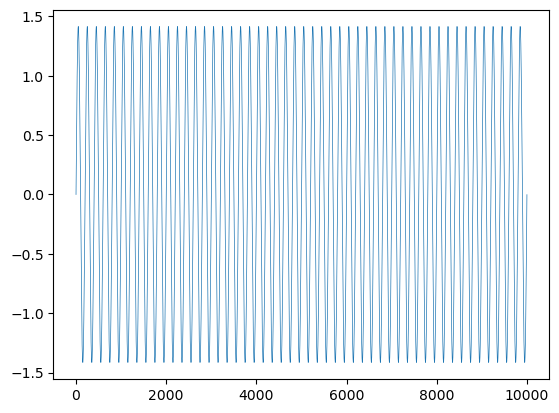

In [4]:
signal = z_transform(x)

plt.plot(t, signal[:, 0], lw=.5)
plt.show()

In [5]:
model = Izhikevich(supervisor=signal, T=T, dt=dt, N=2000, g=5e3, Q=5e3)

voltage_trace = model.render(rls_start=T*.1, rls_stop=T*.6, rls_step=2, n_neurons=10)

100%|██████████| 250000/250000 [21:14<00:00, 196.13it/s]  


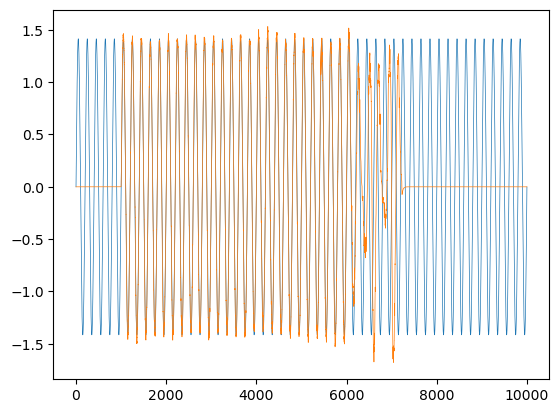

In [6]:
plt.plot(t, signal[:, 0], lw=.5)
plt.plot(t, model.x_hat_rec[:, 0], lw=.5)
plt.show()

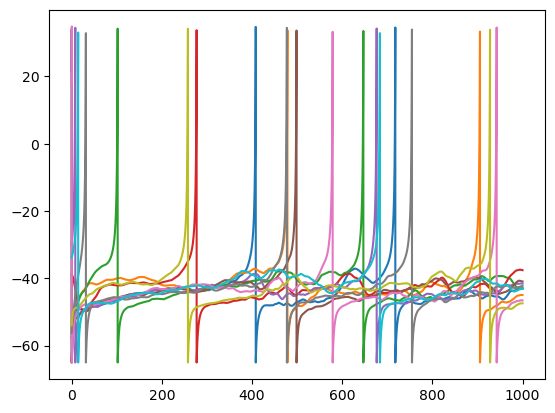

In [21]:
# Pre-learning: pre
rls_start = int(.1*T / dt)
rls_stop = int(.6*T / dt)
diff = int(1000 / dt)
shift = int(3000 / dt)
voltage_pre = voltage_trace[(rls_start-diff):rls_start]
voltage_post = voltage_trace[rls_stop+shift:(shift+rls_stop+diff)]


plt.plot(np.arange(diff) * dt, voltage_pre)
plt.show()

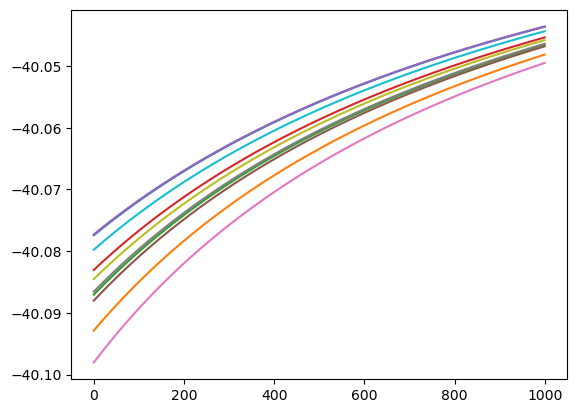

In [22]:
plt.plot(np.arange(diff) * dt, voltage_post)
plt.show()

In [7]:
voltage_trace.shape

(250000, 10)